In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

In [271]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group.*")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [272]:
raw_data=pd.read_csv(r"C:\Users\HP\Downloads\EDA Customer\archive\Hackathon_working_Data.csv")

In [273]:
df=raw_data.copy()

In [275]:
df.shape

(26985, 14)

In [276]:
df.describe(include='all')

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
count,26985,26985,26985.000000,26985,26985.000000,26985.000000,26985.000000,26985.000000,26985,26985,26985,26985,26985,26985
unique,3,10,NaN,6424,NaN,NaN,NaN,NaN,80,174,232,354,643,1315
top,M3,N7,NaN,T1521,NaN,NaN,NaN,NaN,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,BRITANNIA INDS,MARIE GOLD,MARIE GOLD REGULAR
freq,9430,5625,NaN,44,NaN,NaN,NaN,NaN,6677,1954,1954,3147,977,786
mean,NaN,NaN,15.167019,NaN,278.754206,4.105021,67.808551,52.812982,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,8.956057,NaN,541.398504,95.666947,118.005978,84.987730,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,0.000000,0.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7.000000,NaN,40.000000,1.000000,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,14.000000,NaN,111.000000,1.000000,30.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.000000,NaN,280.000000,2.000000,80.000000,64.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [278]:
#Numerical Columns: DAY, BILL_AMT, QTY, VALUE, PRICE (int or float).
#Categorical/Text Columns: MONTH, STORECODE, BILL_ID, GRP, SGRP, etc. (object).

In [279]:
df.head(5)

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [280]:
#just to know what is relation between BILL_AMT	QTY	VALUE	PRICE	
filtered=df[df['BILL_ID']=='T375']

In [281]:
filtered[filtered['BILL_AMT']==420]

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
2806,M1,N2,5,T375,420.0,1.0,70.0,70.0,COFFEE,INSTANT COFFEE,INSTANT COFFEE,NESTLE INDIA,NESCAFE,NESCAFE CLASSIC
2807,M1,N2,5,T375,420.0,1.0,100.0,100.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GIRNAR FOOD & BEVER,GIRNAR,GIRNAR
2808,M1,N2,5,T375,420.0,1.0,200.0,200.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,TATA GLOBAL BEVERAGES LTD,TATA TETLEY,TATA TETLEY
2809,M1,N2,5,T375,420.0,2.0,50.0,25.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,BRITANNIA INDS,NUTRICHOICE,NUTRICHOICE OATS COOKIES


**Observation** There are many same BILL_ID's that are generated from many different stores For example: BILL_ID : T375 is used in store 1,2,3,4,5 and 6. Hence, create a column which contains unique Bill_Id (helpful for sales per store analysis)

## 1. Understanding the data

In [286]:
#new column using STORECODE	BILL_ID
df['UNIQUE_BILL_ID']=df['STORECODE']+df['BILL_ID']

#inserting new column on desired location
df.insert(2, 'UNIQUE_BILL_ID', df.pop('UNIQUE_BILL_ID'))

In [287]:
df.head(2)

,MONTH,STORECODE,UNIQUE_BILL_ID,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,N1T375,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,N1T379,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY


In [288]:
sales_revenue=df.groupby('UNIQUE_BILL_ID')['VALUE'].sum().reset_index()
sales_revenue.head()
sales_revenue[sales_revenue['VALUE']==420]

,UNIQUE_BILL_ID,VALUE
309,N10T2869,420.0
442,N10T3228,420.0
3613,N1T9183,420.0
4062,N2T375,420.0
7403,N5T2853,420.0
8619,N6T1179,420.0
8850,N6T1571,420.0


# 2. Preparing Data for EDA


1. Missing Values

In [292]:
df.isnull().sum()

MONTH             0
STORECODE         0
UNIQUE_BILL_ID    0
DAY               0
BILL_ID           0
BILL_AMT          0
QTY               0
VALUE             0
PRICE             0
GRP               0
SGRP              0
SSGRP             0
CMP               0
MBRD              0
BRD               0
dtype: int64

2.Duplicate Records

In [294]:
#dr=df[df.duplicated(keep='last')]
df.duplicated().sum()

90

In [295]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

3.Data Encoding

In [298]:
df.dtypes

MONTH              object
STORECODE          object
UNIQUE_BILL_ID     object
DAY                 int64
BILL_ID            object
BILL_AMT          float64
QTY               float64
VALUE             float64
PRICE             float64
GRP                object
SGRP               object
SSGRP              object
CMP                object
MBRD               object
BRD                object
dtype: object

There are 2 categorial columns (STORECODE,MONTH). Enocding these columns is a crucial step in preparing data for machine learning models, as most models require numerical input

In [300]:
#month column
def remove_str(column):
    return column.str.replace('M','')
df['MONTH']=remove_str(df['MONTH'])
df['MONTH']=df['MONTH'].astype(int)

In [301]:
#STORECODE
encoder=LabelEncoder()
df['STORECODE']=encoder.fit_transform(df['STORECODE'])+1

In [303]:
df.STORECODE.value_counts()

STORECODE
8     5602
1     4563
6     4420
5     3210
2     2154
4     1785
10    1526
3     1327
7     1181
9     1127
Name: count, dtype: int64

4.Numerical Variables

In [306]:
numerical_cols=[x for x in df.columns if df[x].dtypes!='O' ]
print('Number of numerical columns:',len(numerical_cols))
df[numerical_cols].sample(1)

Number of numerical columns: 7


,MONTH,STORECODE,DAY,BILL_AMT,QTY,VALUE,PRICE
21414,2,2,28,20.0,1.0,10.0,10.0


5.Categorical Variables

In [308]:

categorical_cols=[x for x in df.columns if df[x].dtypes=='O' ]
print('Number of numerical columns:',len(categorical_cols))
df[categorical_cols].sample(1)

Number of numerical columns: 8


,UNIQUE_BILL_ID,BILL_ID,GRP,SGRP,SSGRP,CMP,MBRD,BRD
5598,N7T436,T436,TOILET SOAPS (04/00),POPULAR,POPULAR,HINDUSTAN UNILEVER LIMITED,LIFEBUOY,LIFEBUOY NEEM & ALOEVERA


6.Distribuiton of Numerical values

Distribution of continuous numerical features in your dataset

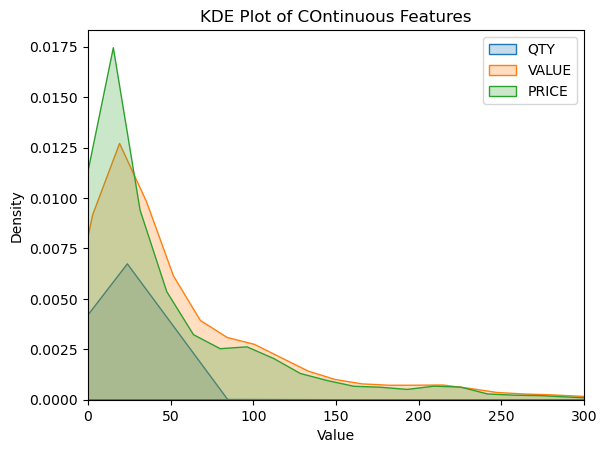

In [313]:
continuous_feautures=['QTY','VALUE','PRICE']
for x in continuous_feautures:
    sns.kdeplot(df[x],shade=True,label=x)
plt.title('KDE Plot of COntinuous Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0,300)
plt.legend()
plt.show()

a. Overall Sales by Month

MONTH M2 produced Highest Revenue

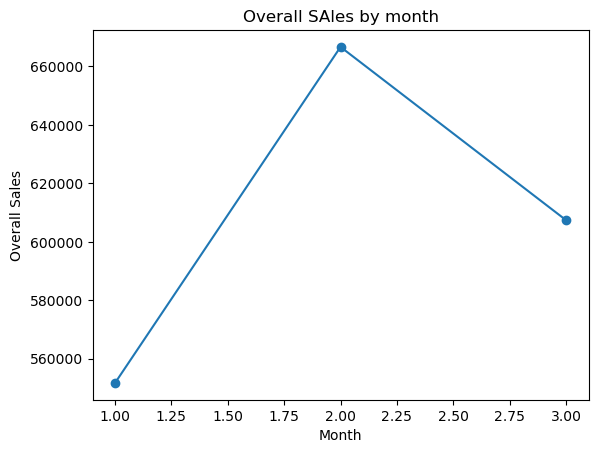

In [333]:
sales_by_month=df.groupby('MONTH')['VALUE'].sum()
sales_by_month.plot(kind='line',marker='o')
plt.xlabel('Month')
plt.ylabel('Overall Sales')
plt.title('Overall SAles by month')
plt.show()

b. Overall sales by store

Store N8 has the highest revenue in all 3 months, whereas store N7 has the lowest revenue off all 10 stores. When it comes to avareage sales in each store, N3 has the highest average sales

In [340]:
sales_per_store = df.groupby('STORECODE')['VALUE'].sum().reset_index()
sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
sales_per_store.head(3)

,STORECODE,VALUE
7,8,273296.65
9,10,250777.03
5,6,237242.00


In [342]:
Average_sales_per_store = df.groupby('STORECODE')['VALUE'].mean().reset_index()
Average_sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
Average_sales_per_store.head(3)

,STORECODE,VALUE
2,3,166.748304
9,10,164.336193
8,9,103.302449


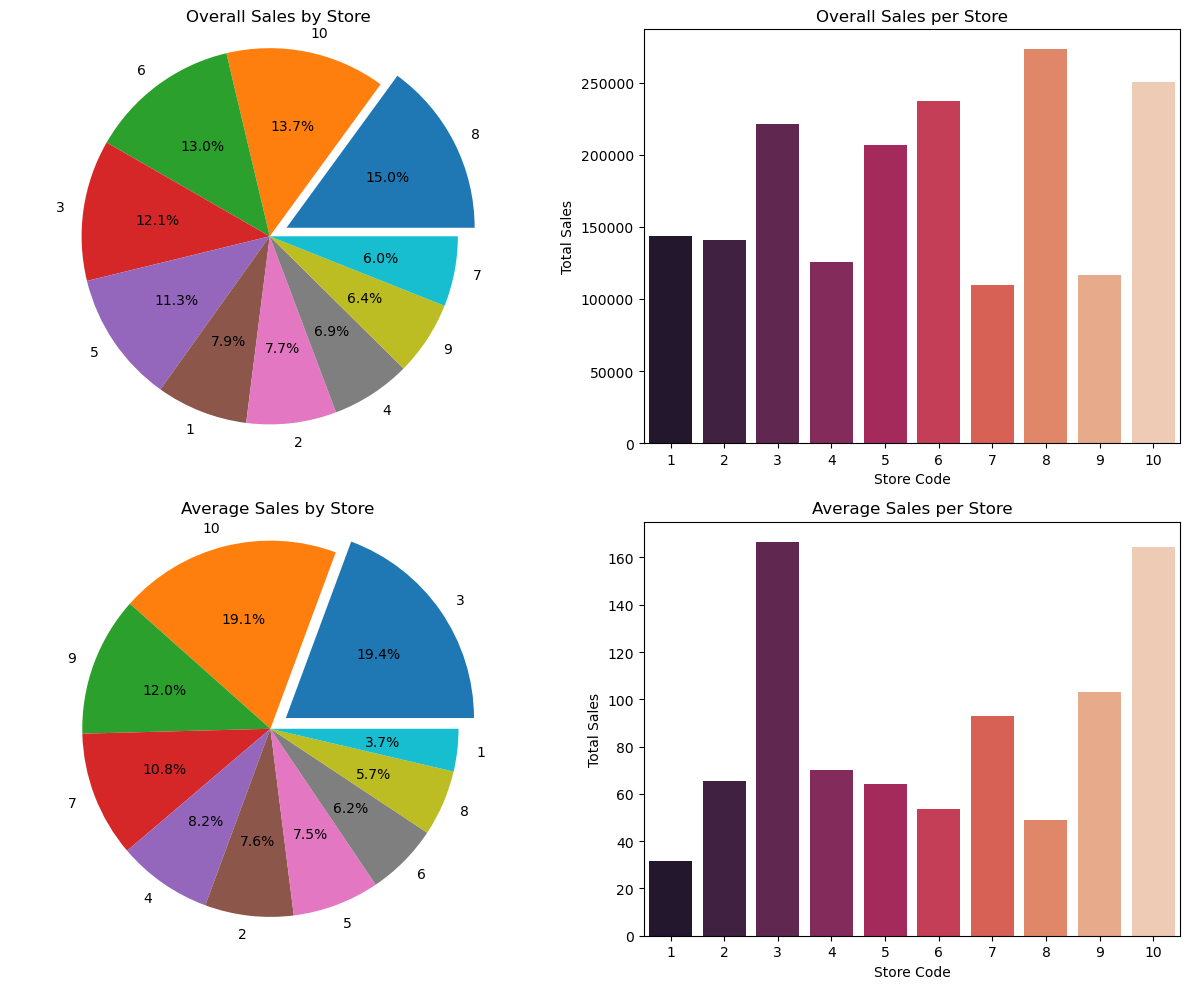

In [344]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Pie chart
explode = [0.1, 0,0,0,0,0,0,0,0,0]
#The first slice is pulled out by 10% of the radius to draw attention to it.
axes[0, 0].pie(sales_per_store['VALUE'], labels=sales_per_store['STORECODE'],explode=explode, autopct='%1.1f%%')
axes[0, 0].set_title('Overall Sales by Store')
axes[0, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=sales_per_store, palette="rocket", ax=axes[0, 1])
axes[0, 1].set_title('Overall Sales per Store')
axes[0, 1].set_xlabel('Store Code')
axes[0, 1].set_ylabel('Total Sales')
# Pie chart
axes[1, 0].pie(Average_sales_per_store['VALUE'], labels=Average_sales_per_store['STORECODE'],explode=explode, autopct='%1.1f%%')
axes[1, 0].set_title('Average Sales by Store')
axes[1, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=Average_sales_per_store, palette="rocket", ax=axes[1, 1])
axes[1, 1].set_title('Average Sales per Store')
axes[1, 1].set_xlabel('Store Code')
axes[1, 1].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()

***C. Total number of products sold over 3 months***

In [347]:
total_products_per_store= df.groupby('STORECODE')['QTY'].sum().sort_values(ascending=False).reset_index()

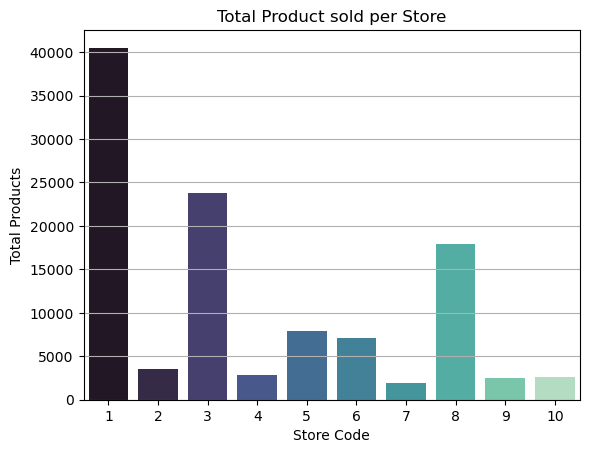

In [349]:
sns.barplot( x='STORECODE', y='QTY',data=total_products_per_store, palette = "mako")
plt.title('Total Product sold per Store')
plt.xlabel('Store Code')
plt.ylabel('Total Products')
plt.grid(axis='y')
plt.show()

***d. Total orders per day***

In [352]:
orders_per_store_per_day_per_month=df.groupby(['STORECODE','MONTH','DAY'])['UNIQUE_BILL_ID'].nunique().reset_index().sort_values(by='UNIQUE_BILL_ID',ascending=False)

In [354]:
orders_per_store_per_day_per_month

,STORECODE,MONTH,DAY,UNIQUE_BILL_ID
515,8,2,30,81
1,1,1,5,79
499,8,2,12,78
4,1,1,8,77
14,1,1,20,77
...,...,...,...,...
408,7,1,2,1
603,9,3,28,1
409,7,1,3,1
410,7,1,10,1


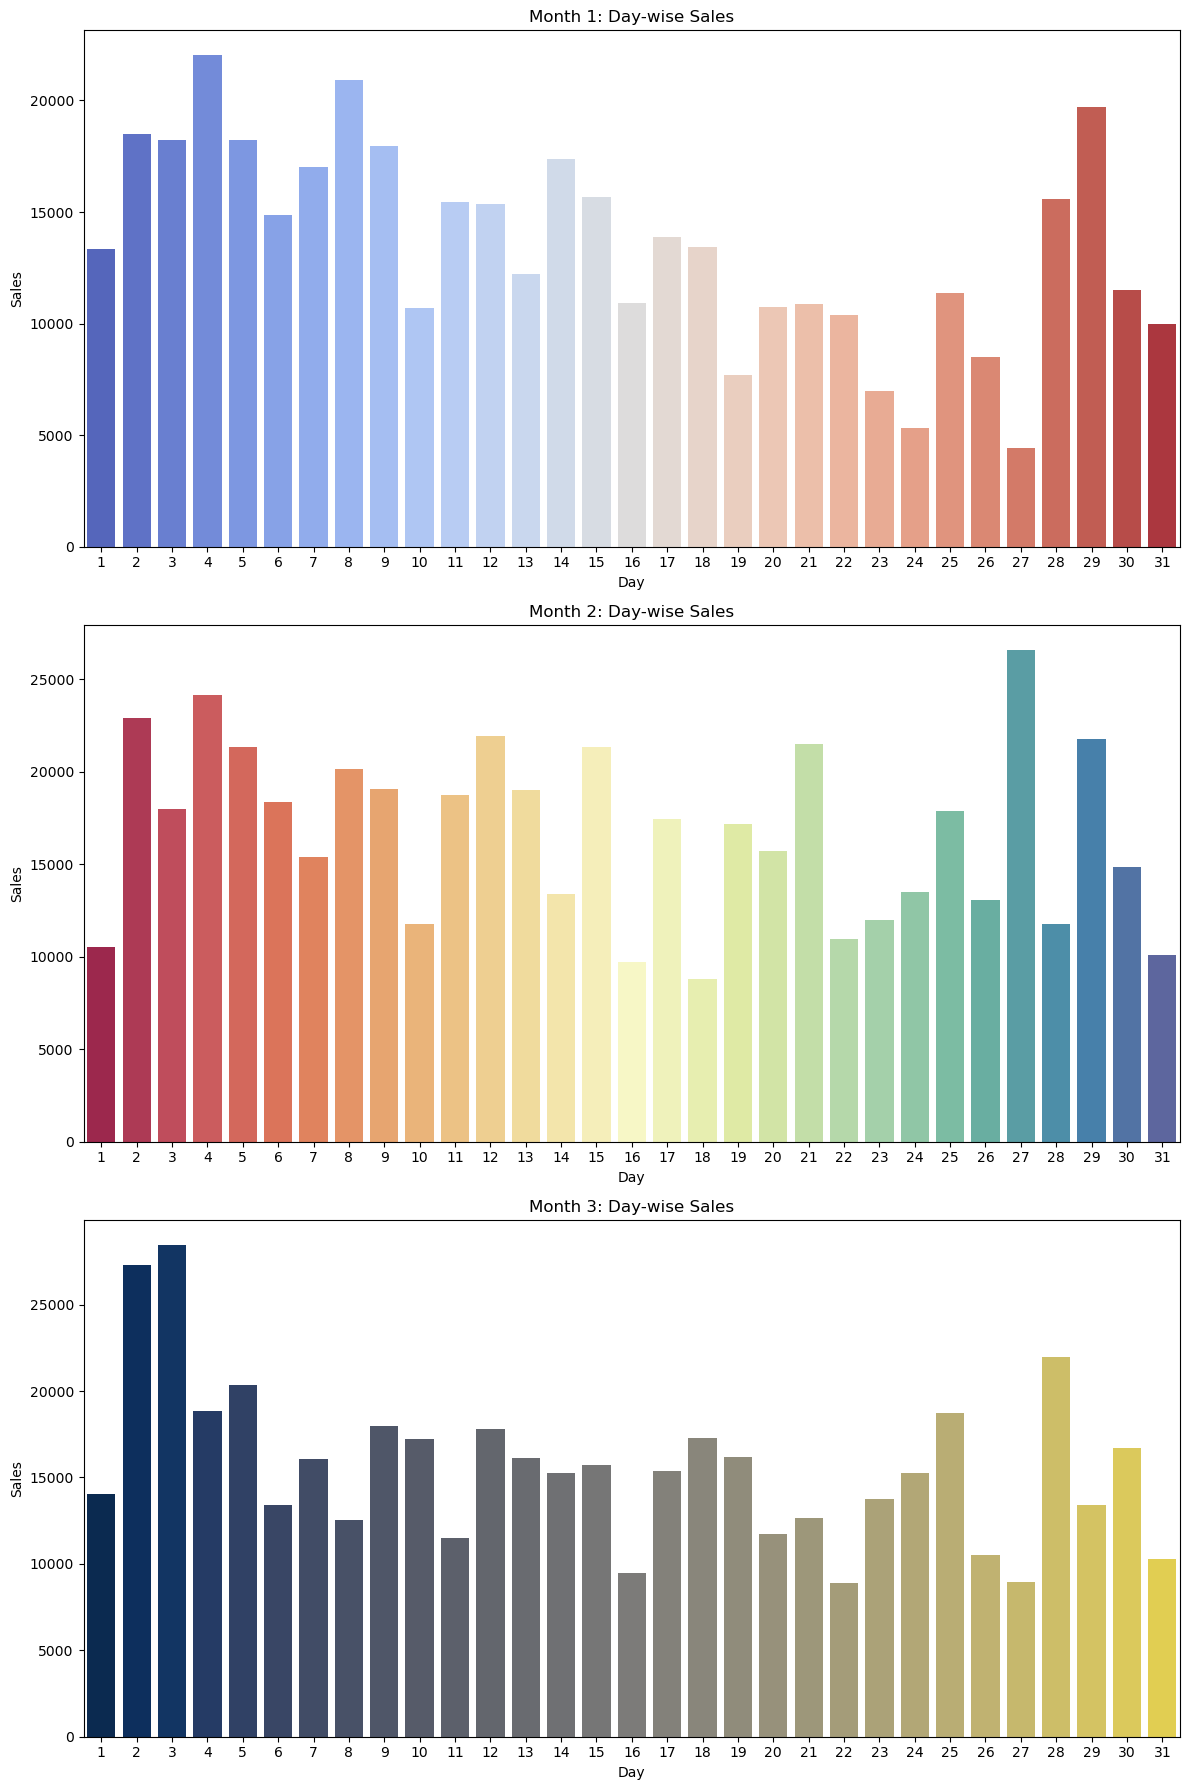

In [356]:
months = df['MONTH'].unique()
plt.figure(figsize=(12, 6 * len(months)))
palettes = ['viridis', 'coolwarm', 'Spectral', 'cividis']
for i, month in enumerate(months, 1):
    month_data = df[df['MONTH'] == month]
    day_sales_month = month_data.groupby('DAY')['PRICE'].sum().reset_index()
    
    plt.subplot(len(months), 1, i)
    sns.barplot(x='DAY', y='PRICE', data=day_sales_month,palette=palettes[i])
    plt.xlabel('Day')
    plt.ylabel('Sales')
    plt.title(f"Month {month}: Day-wise Sales")

plt.tight_layout()
plt.show()

**g. The most bought product**

In [359]:
most_bought_product=df['GRP'].value_counts().idxmax()
frequency=df['GRP'].value_counts().max()
print(f'Most bought product is :{most_bought_product} with frequency {frequency}')

Most bought product is :BISCUITS - CORE & NON CORE with frequency 6646


In [361]:
print("Unique GRP count:", df['GRP'].nunique())

Unique GRP count: 80


 **h. Top 10 Products that Customers most preferred in each store**

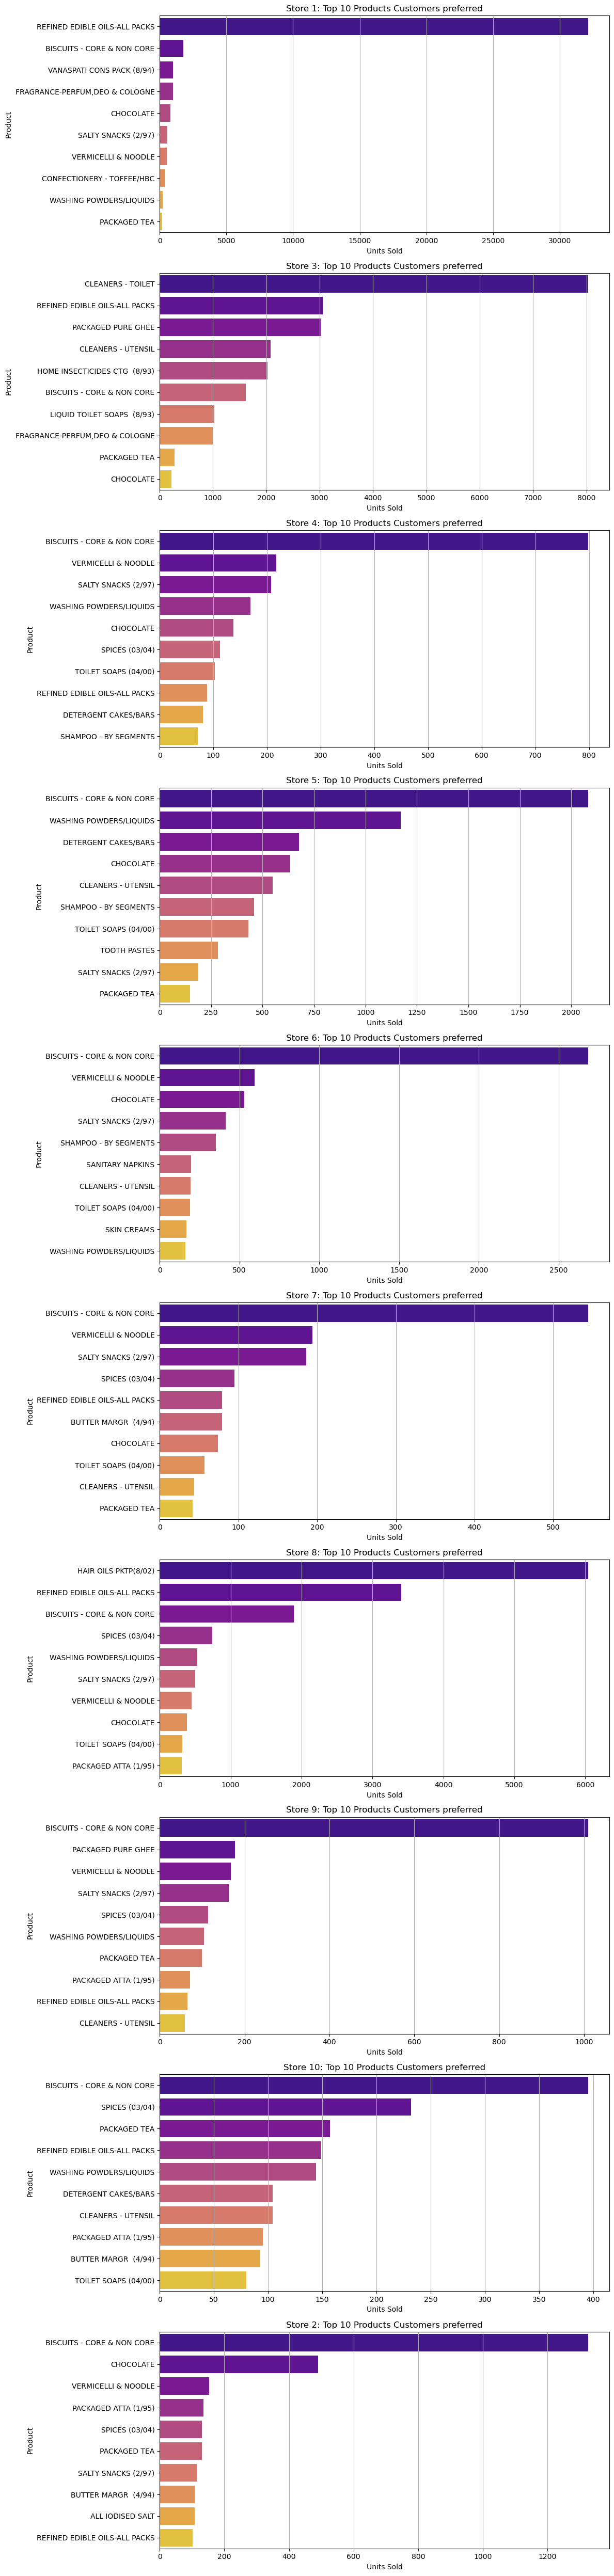

In [364]:
stores=df['STORECODE'].unique()
plt.figure(figsize=(12,5*len(stores)))
palettes = ['coolwarm', 'viridis', 'Spectral', 'Dark2']

for i, store in enumerate(stores, 1):
    store_data = df[df['STORECODE'] == store]
    most_bought_product_in_each_store = store_data.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
    plt.subplot(len(stores), 1, i)
    sns.barplot(x='QTY', y='GRP', data=most_bought_product_in_each_store[:10], palette='plasma')
    plt.grid(axis='x')
    plt.xlabel('Units Sold')
    plt.ylabel('Product')
    plt.title(f"Store {store}: Top 10 Products Customers preferred")
plt.tight_layout()
plt.show()

**i.Top 3 products sold in each store**

In [375]:
most_b_product_in_each_store = df.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
most_b_product_in_each_store.head()

,STORECODE,GRP,QTY
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0
1,3,CLEANERS - TOILET,8027.0
2,8,HAIR OILS PKTP(8/02),6037.0
3,8,REFINED EDIBLE OILS-ALL PACKS,3403.0
4,3,REFINED EDIBLE OILS-ALL PACKS,3057.0


MONTH (Skewness: -0.07)


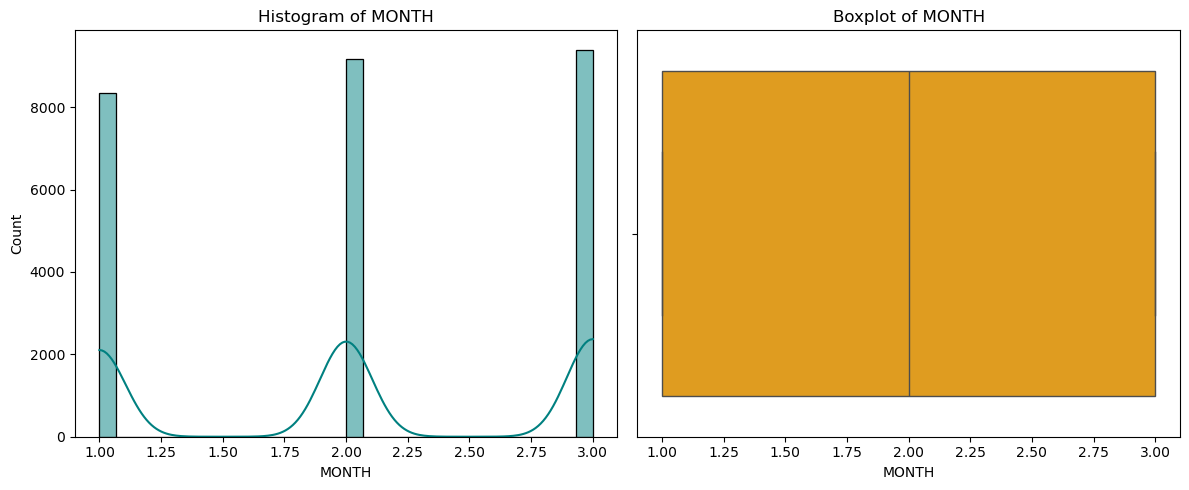

STORECODE (Skewness: -0.15)


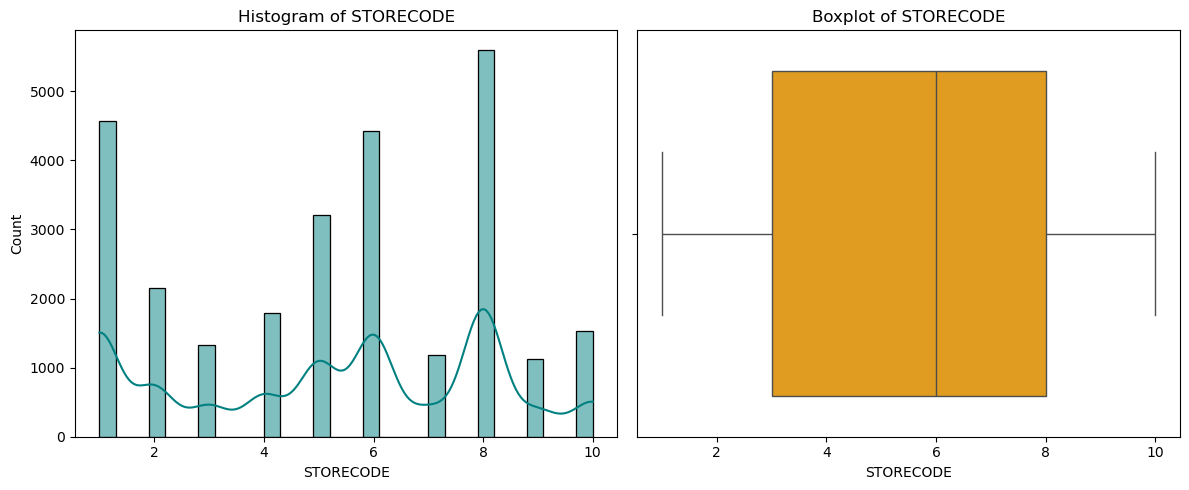

DAY (Skewness: 0.16)


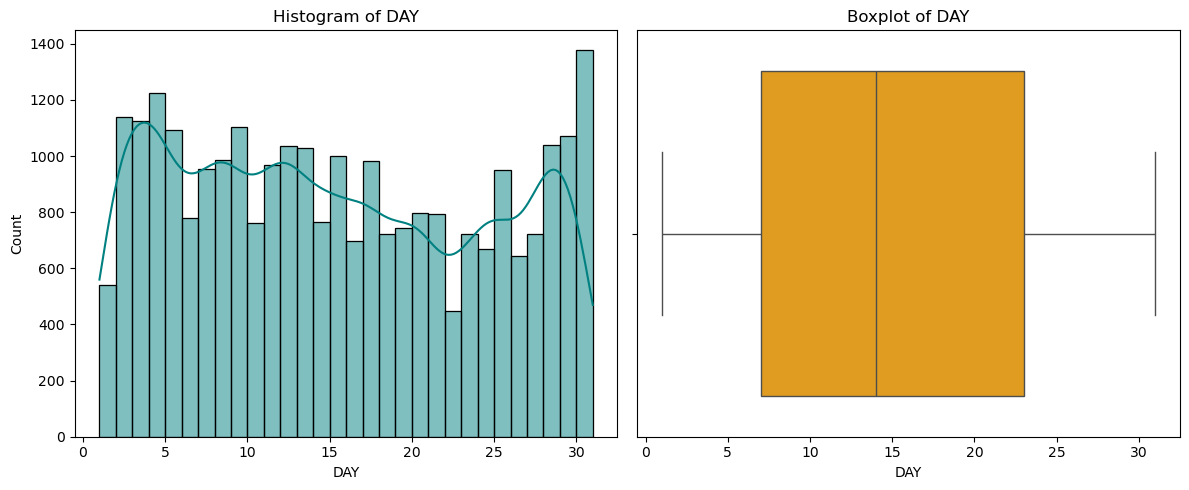

BILL_AMT (Skewness: 5.94)


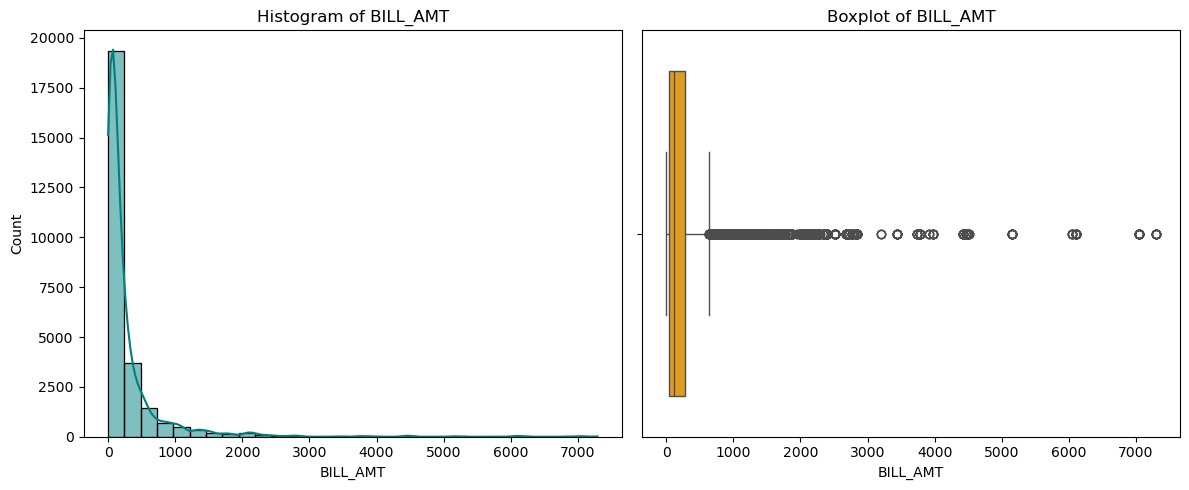

QTY (Skewness: 84.94)


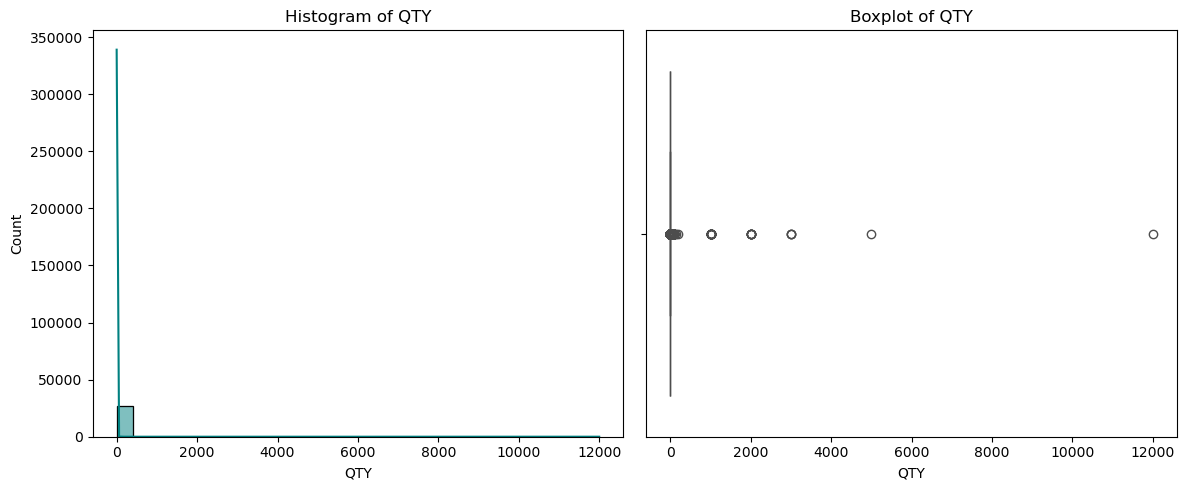

VALUE (Skewness: 8.22)


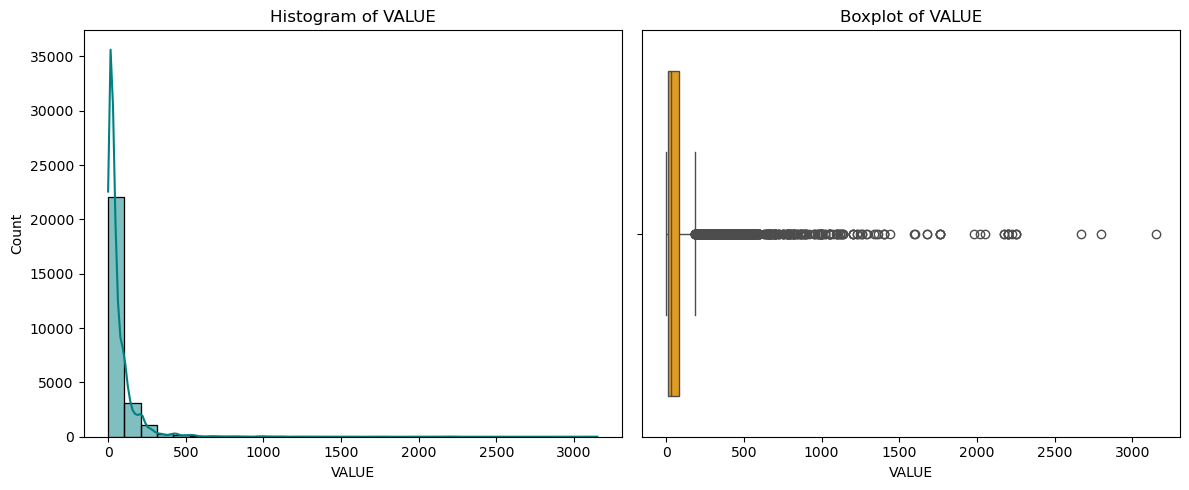

PRICE (Skewness: 7.17)


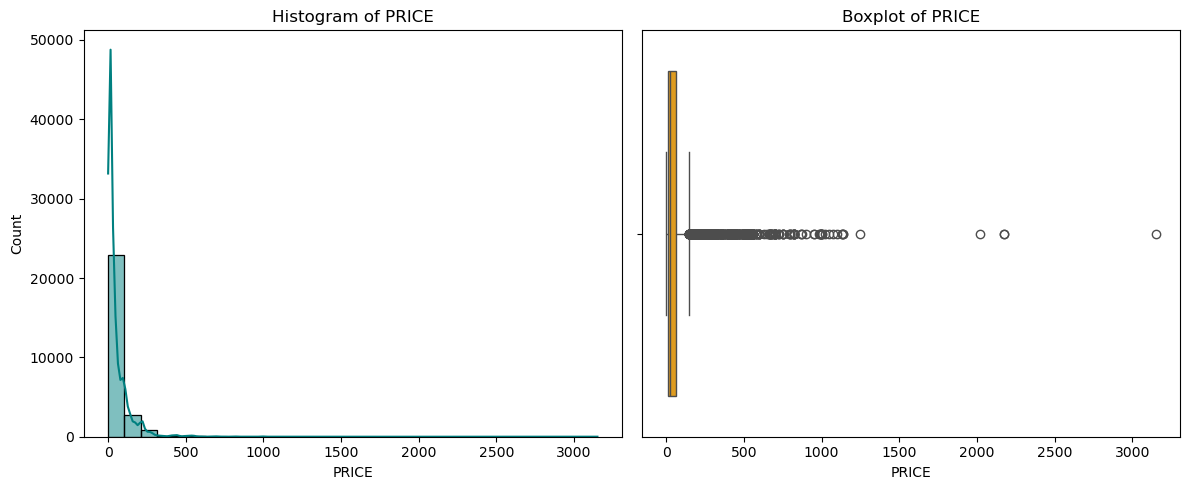

In [385]:
for col in numerical_cols:
    skewness = round(df[col].skew(), 2)
    print(f"{col} (Skewness: {skewness})")
    
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='teal', bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


***Univariate Analysis on Categorical variables***

Most sold product GRP is Biscuts<br>
Cream is most bought sub category of products<br>
The most prefered products by the customers are from Hindustan Uniliver Limited<br>
The most products are sold by TATA,DAIRY MILK and AMUL<br>

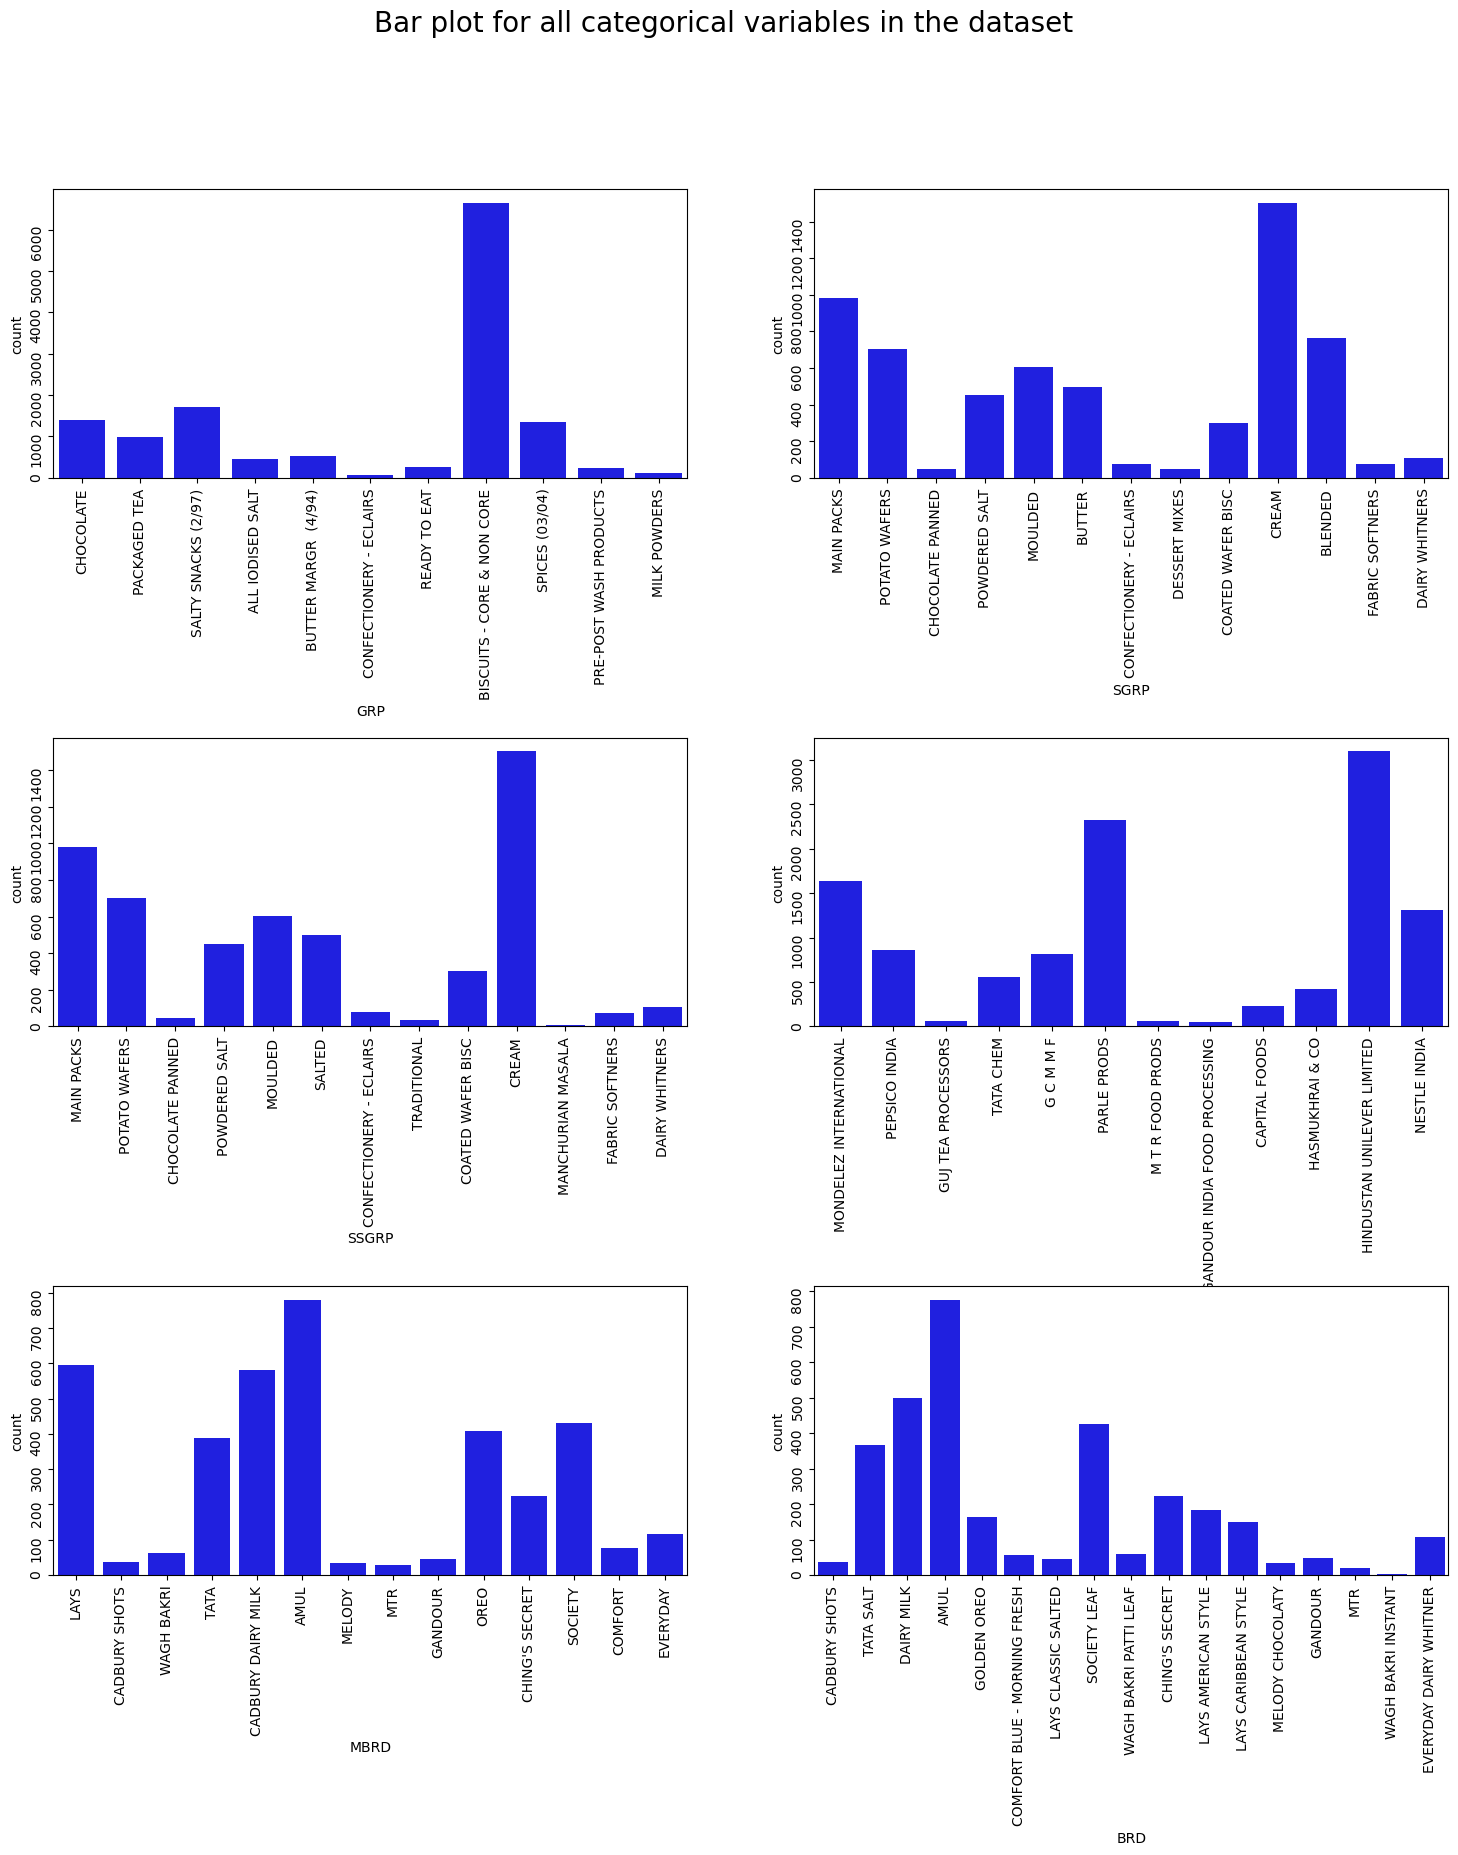

In [400]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18),gridspec_kw={'hspace': 0.9})
fig.suptitle('Bar plot for all categorical variables in the dataset ',fontsize=20)
# grp 
sns.countplot(ax = axes[0, 0], x = 'GRP', data = df, color = 'blue', 
              order = df['GRP'].head(20).value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'SGRP', data = df, color = 'blue', 
              order = df['SGRP'].head(20).value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'SSGRP', data = df, color = 'blue', 
              order = df['SSGRP'].head(20).value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'CMP', data = df, color = 'blue', 
              order = df['CMP'].head(20).value_counts().index);

sns.countplot(ax = axes[2, 0], x = 'MBRD', data = df, color = 'blue', 
              order = df['MBRD'].head(20).value_counts().index);

sns.countplot(ax = axes[2, 1], x = 'BRD', data = df, color = 'blue', 
              order = df['BRD'].head(20).value_counts().index);
for ax in axes.flatten():
    ax.tick_params(labelrotation=90)
plt.show()